# Konrad Werbliński - Pracownia 2, zadanie 10

# Kod

In [1267]:
using PyPlot

## Funkcje pomocnicze

In [1269]:
function curry(f)
  x -> y -> f(x, y)
end

curry (generic function with 1 method)

In [1270]:
function float_range(b, e, n)
    res = Float64[]
    s =  (e - b) / (n - 1) 
    
    for i in 0 : (n - 1);
        push!(res, b + i * s)
    end
    
    res
end

float_range (generic function with 1 method)

## Generowanie węzłów

### Równoodległe

In [1271]:
function even_spaced_nodes(n)
    nodes = []
    for i in [0 : n;]
        push!(nodes, (2 * i) / n - 1)
    end
    nodes
end

even_spaced_nodes (generic function with 1 method)

### Zera wielomianów Czebyszewa pierwszego rodzaju

In [1272]:
function chebyshev_zeros_nodes(n)
    nodes = []
    for i in [1 : n + 1;]
        push!(nodes, cos((2 * i - 1) / (2 * (n + 1)) * pi ))
    end
    nodes
end

chebyshev_zeros_nodes (generic function with 1 method)

### Losowe

In [1273]:
function random_nodes(n)
    nodes = []
    while length(nodes) != n + 1
        x = Base.Random.rand() * 2.0 - 1
        if !(x in nodes) 
            push!(nodes, x)
        end            
    end
    nodes
end

random_nodes (generic function with 1 method)

## Obliczanie wskaźnika uwarunkowania

In [1274]:
function lambda(nodes, k, x)
    res = 1 
    for i in [1 : length(nodes);]
        if i != k 
            res *= (x - nodes[i]) / (nodes[k] - nodes[i])
        end            
    end
    res
end

lambda (generic function with 1 method)

In [1275]:
function lambda_sum(nodes, point)
    val = 0 
    for i in [1 : length(nodes);]
        val += abs(lambda(nodes, i, point))
    end
    val
end



lambda_sum (generic function with 1 method)

In [1276]:
function condition_number(nodes, samples) 
    maximum(map(curry(lambda_sum)(nodes), float_range(-1, 1, samples)))
end

condition_number (generic function with 1 method)

## Interpolacja

In [1277]:
function interpolation_polynomial(f, nodes, x)
    res = 0
    
    for i in [1 : length(nodes);]
        res += lambda(nodes, i, x) * f(nodes[i])
    end
    
    res
end

interpolation_polynomial (generic function with 1 method)

# Doświadczenia

In [1278]:
samples = 1000

1000

## Obliczanie wskaźnika uwarunkowania zadania

$$ K_n := \max _{-1\le t\le 1} \sum_{i = 0}^{n}  \mid\lambda _i (t) \mid $$

niech:

$$ \sigma (t) =  \sum_{i = 0}^{n}  \mid\lambda _i (t) \mid $$

wtedy:

$$ K_n := \max _{-1\le t\le 1} \sigma (t) $$

### 6 węzłów

#### Wykres funkcji $\sigma$

In [1395]:
n = 5

5

##### Węzły równoodległe

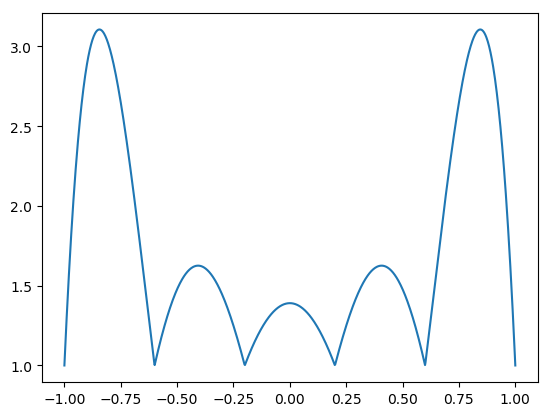

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B3A38F98>

In [1280]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(even_spaced_nodes(n)), float_range(-1, 1, samples)))

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

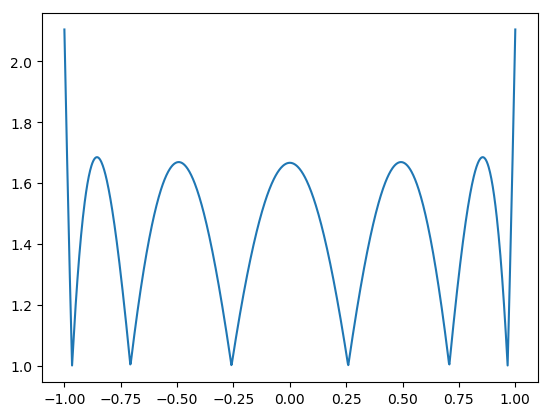

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B3D0EE80>

In [1281]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(chebyshev_zeros_nodes(n)), float_range(-1, 1, samples)))

##### Losowe węzły

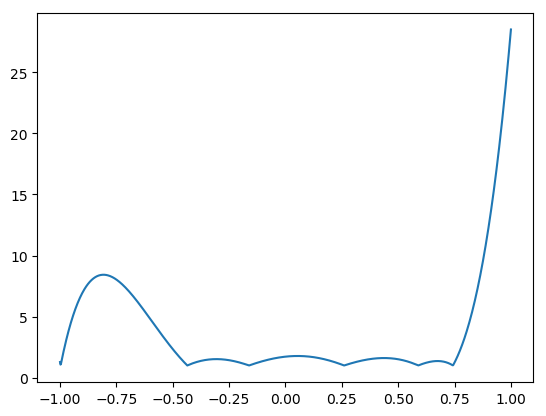

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000C05AC550>

In [1411]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(random_nodes(n)), float_range(-1, 1, samples)))

#### Wartość wskaźnika uwarunkowania zadania

Węzły równoodległe

In [1283]:
condition_number(even_spaced_nodes(n), samples)

3.106262343309961

Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [1284]:
condition_number(chebyshev_zeros_nodes(n), samples)

2.1043976826464865

Losowe węzły

In [1285]:
sum(map(x -> condition_number(random_nodes(n), samples), [1:20;])) / 20

19146.193586569167

### 11 węzłów

In [1286]:
n = 10

10

#### Wykres funkcji  σ

##### Węzły równoodległe

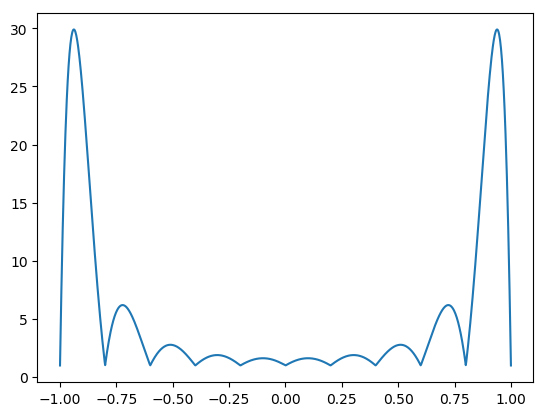

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B4233E10>

In [1287]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(even_spaced_nodes(n)), float_range(-1, 1, samples)))

#### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

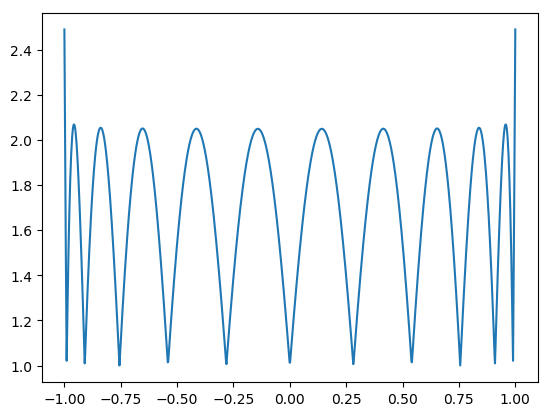

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B44BE5F8>

In [1288]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(chebyshev_zeros_nodes(n)), float_range(-1, 1, samples)))

##### Losowe węzły

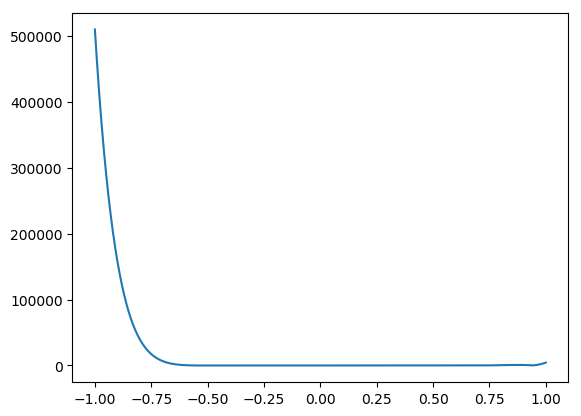

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B477D0B8>

In [1289]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(random_nodes(n)), float_range(-1, 1, samples)))

#### Wartość wskaźnika uwarunkowania zadania

Węzły równoodległe

In [1290]:
condition_number(even_spaced_nodes(n), samples)

29.89775881601561

Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [1291]:
condition_number(chebyshev_zeros_nodes(n), samples)

2.489430376881975

Losowe węzły

In [1292]:
sum(map(x -> condition_number(random_nodes(n), samples), [1:20;])) / 20

2.9664228612345233e9

### 16 węzłów

In [1293]:
n = 15

15

#### Wykres funkcji  σ

##### Węzły równoodległe

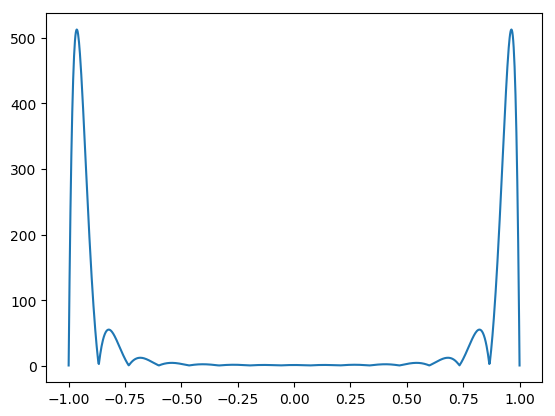

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B4A022E8>

In [1294]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(even_spaced_nodes(n)), float_range(-1, 1, samples)))

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

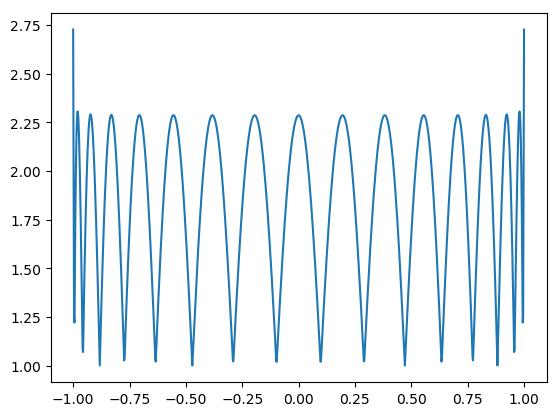

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B4BF6550>

In [1295]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(chebyshev_zeros_nodes(n)), float_range(-1, 1, samples)))

##### Losowe węzły

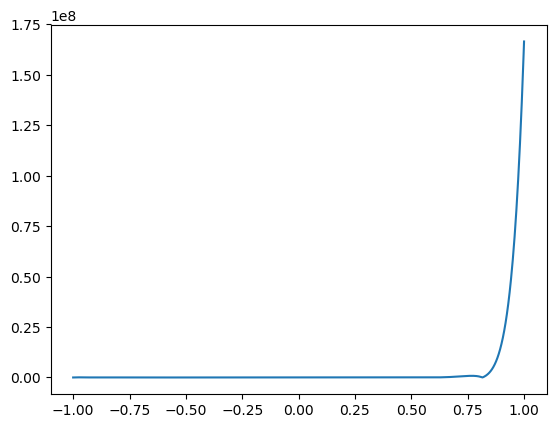

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B4F4E0B8>

In [1296]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(random_nodes(n)), float_range(-1, 1, samples)))

#### Wartość wskaźnika uwarunkowania zadania

Węzły równoodległe

In [1297]:
condition_number(even_spaced_nodes(n), samples)

512.3496345042895

Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [1298]:
condition_number(chebyshev_zeros_nodes(n), samples)

2.7277779364183505

Losowe węzły

In [1299]:
sum(map(x -> condition_number(random_nodes(n), samples), [1:20;])) / 20

9.768266018584996e11

### 21 węzłów

In [1300]:
n = 20

20

#### Wykres funkcji  σ

##### Węzły równoodległe

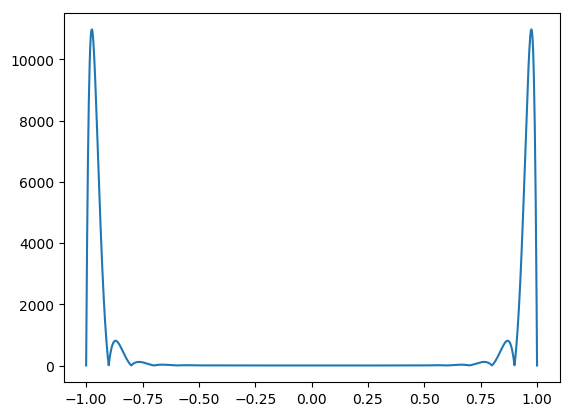

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B5050860>

In [1301]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(even_spaced_nodes(n)), float_range(-1, 1, samples)))

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

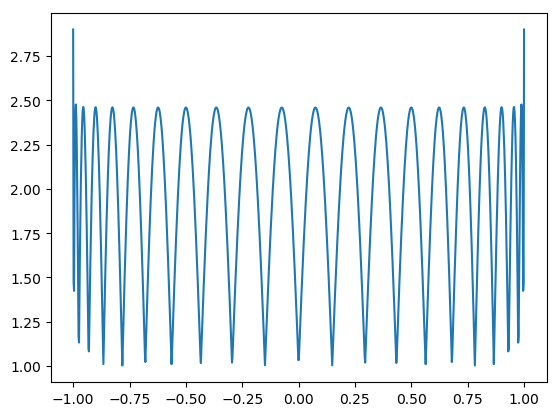

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B5468AC8>

In [1302]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(chebyshev_zeros_nodes(n)), float_range(-1, 1, samples)))

##### Losowe węzły

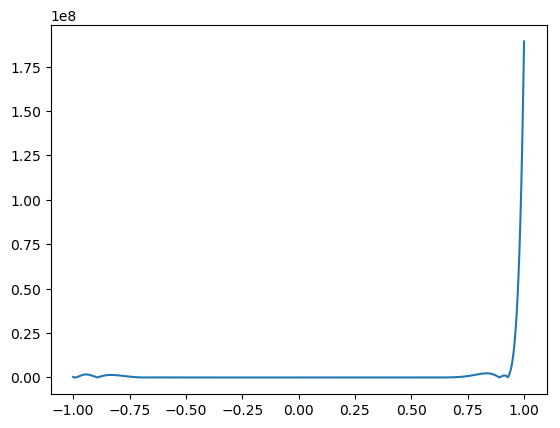

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B55DC630>

In [1303]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(random_nodes(n)), float_range(-1, 1, samples)))

#### Wartość wskaźnika uwarunkowania zadania

Węzły równoodległe

In [1304]:
condition_number(even_spaced_nodes(n), samples)

10978.795044663142

Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [1305]:
condition_number(chebyshev_zeros_nodes(n), samples)

2.9008249044468988

Losowe węzły

In [1306]:
sum(map(x -> condition_number(random_nodes(n), samples), [1:20;])) / 20

1.2693437540085867e14

### 31 węzłów

In [1307]:
n = 30

30

#### Wykres funkcji  σ

##### Węzły równoodległe

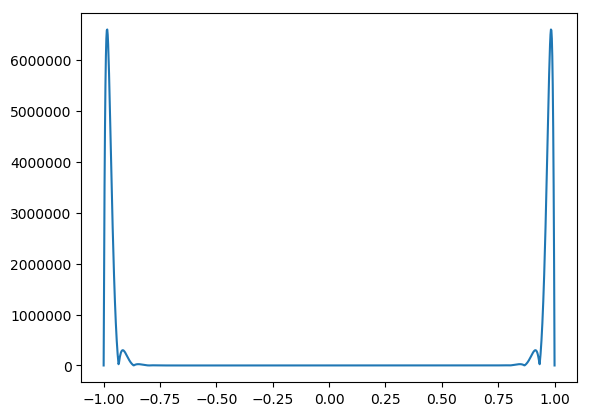

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B59FC198>

In [1308]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(even_spaced_nodes(n)), float_range(-1, 1, samples)))

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

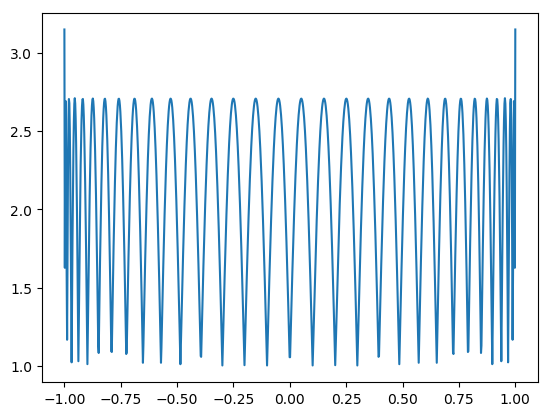

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B5C8B860>

In [1309]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(chebyshev_zeros_nodes(n)), float_range(-1, 1, samples)))

##### Losowe węzły

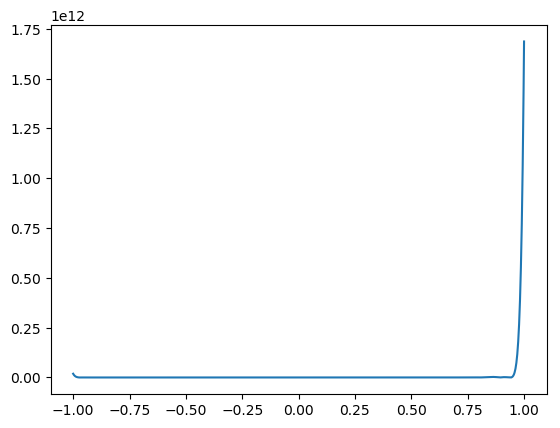

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000B5D91668>

In [1310]:
plot(float_range(-1, 1, samples) , map(curry(lambda_sum)(random_nodes(n)), float_range(-1, 1, samples)))

#### Wartość wskaźnika uwarunkowania zadania

Węzły równoodległe

In [1311]:
condition_number(even_spaced_nodes(n), samples)

6.592136042064592e6

Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [1312]:
condition_number(chebyshev_zeros_nodes(n), samples)

3.148712373665145

Losowe węzły

In [1313]:
sum(map(x -> condition_number(random_nodes(n), samples), [1:20;])) / 20

4.0023468715559076e18

## Interpolacja

### Procedura rysująca funkcję i wielomian interpolacyjny

In [1314]:
function draw_two_functions(samples, f, g)
    plot(float_range(-1, 1, samples), map(f, float_range(-1, 1, samples)))
    plot(float_range(-1, 1, samples), map(i, float_range(-1, 1, samples)), color = "r")
end    

draw_two_functions (generic function with 1 method)

### Procedura rysująca wykres różnicy

In [1315]:
function draw_functions_difference(samples, f, g)
    h = x -> f(x) - g(x) 
    plot(float_range(-1, 1, samples), map(h, float_range(-1, 1, samples)))
end

draw_functions_difference (generic function with 1 method)

## Test 1. Funkcja Rungego

In [1990]:
f(x) = 1 / (1 + 25 * x ^ 2)

f (generic function with 1 method)

### 6 węzłów

#### Węzły równoodległe

In [1792]:
nds = even_spaced_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

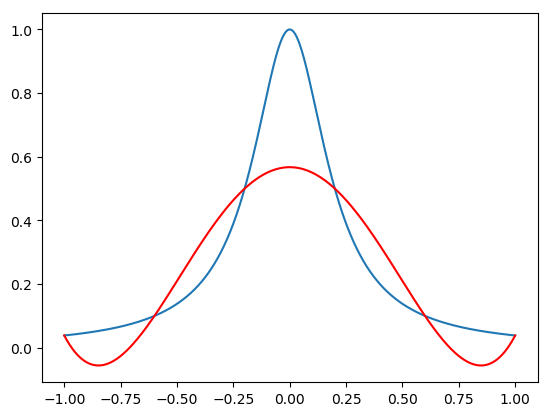

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000E7A99198>

In [1793]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

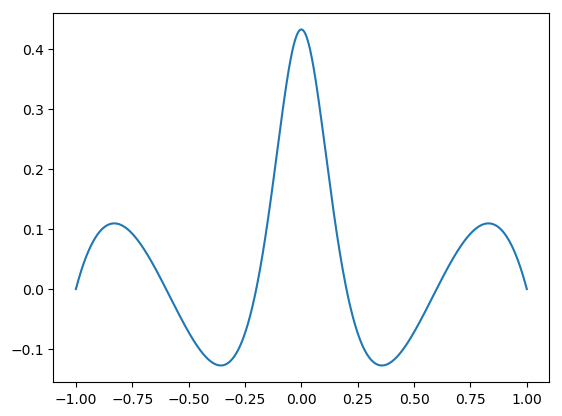

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000E7FED390>

In [1794]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [1795]:
nds = chebyshev_zeros_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

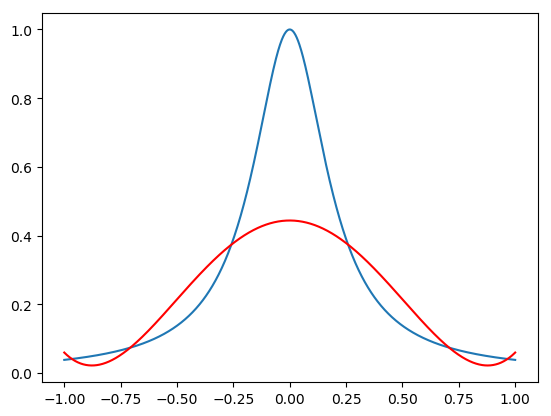

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000E821D780>

In [1796]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

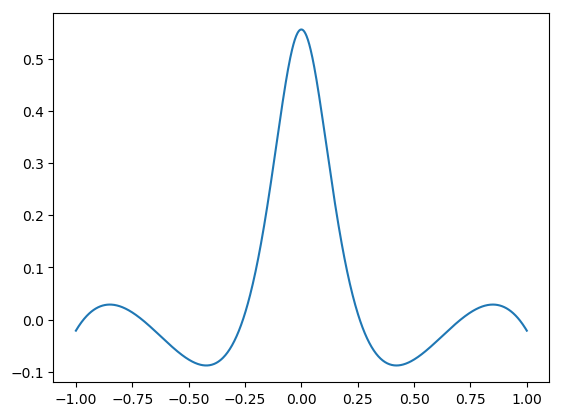

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000E848FE10>

In [1797]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [1798]:
nds = random_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

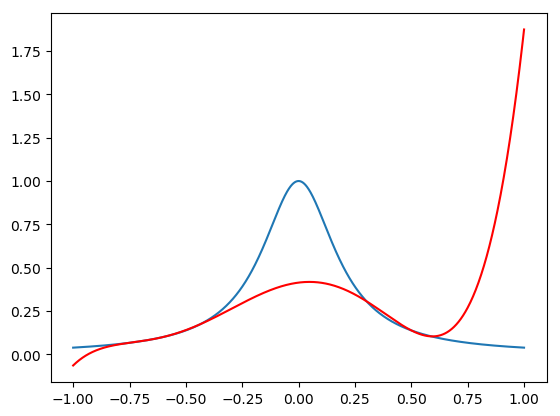

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000E7D321D0>

In [1799]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

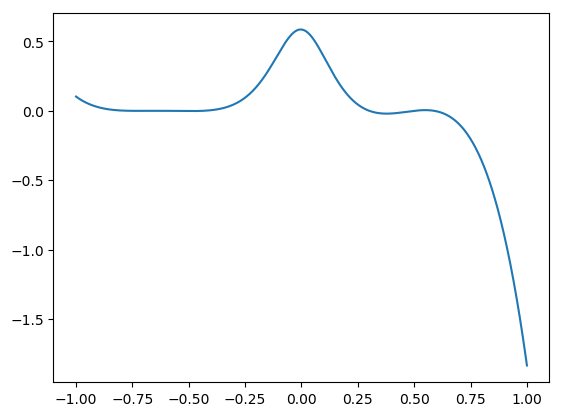

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000E89D42B0>

In [1800]:
draw_functions_difference(samples, f, i)

### 16 węzłów

##### Węzły równoodległe

In [1991]:
nds = even_spaced_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

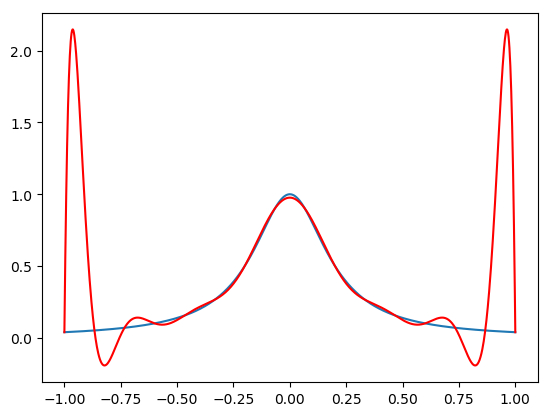

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000FCB21518>

In [1992]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

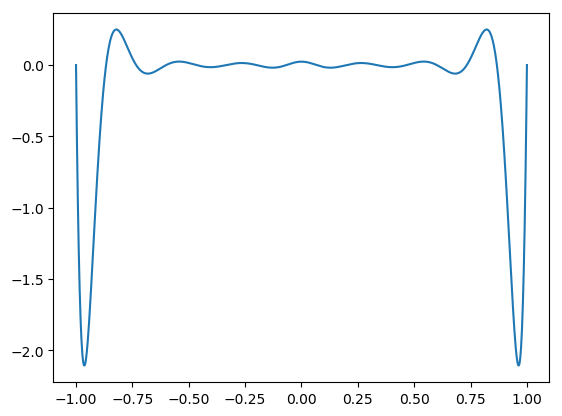

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000FCFC58D0>

In [1993]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [1994]:
nds = chebyshev_zeros_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

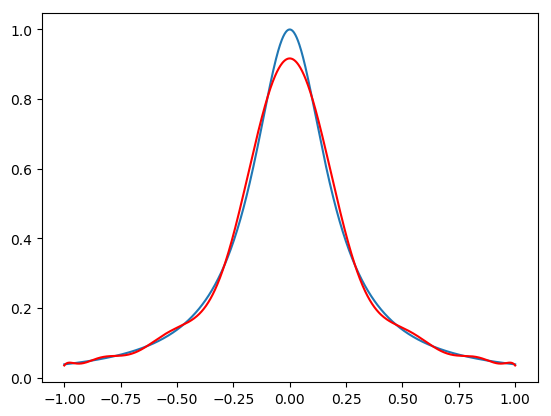

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000FCFC5978>

In [1995]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

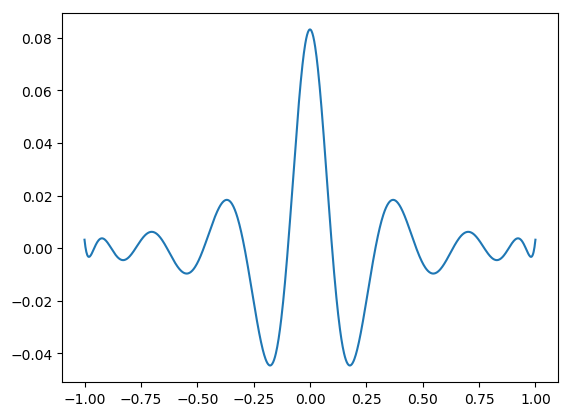

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000FD4FCD30>

In [1996]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [1997]:
nds = random_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

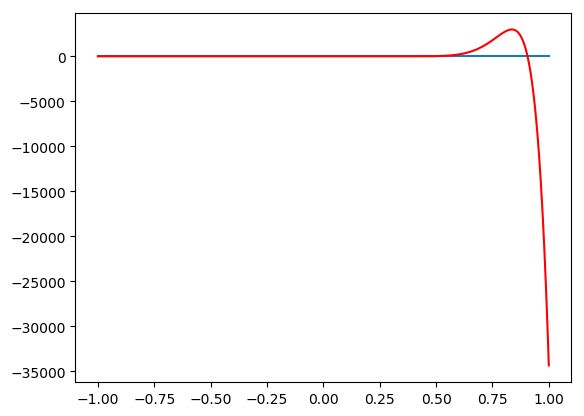

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000FD4FCDD8>

In [1998]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

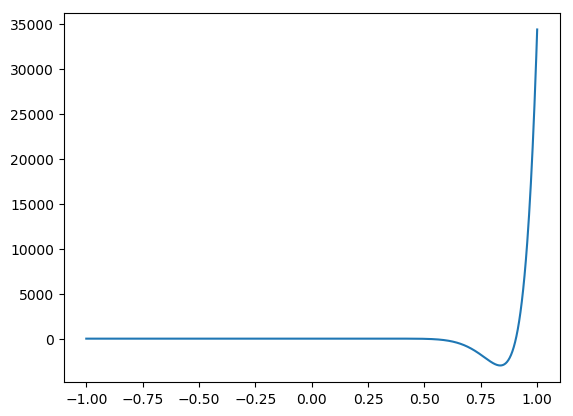

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000FDA4F390>

In [1999]:
draw_functions_difference(samples, f, i)

## Test 2. Arcus tangens

In [2057]:
f(x) = atan(x)

f (generic function with 1 method)

### 6 węzłów

##### Węzły równoodległe

In [2058]:
nds = even_spaced_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

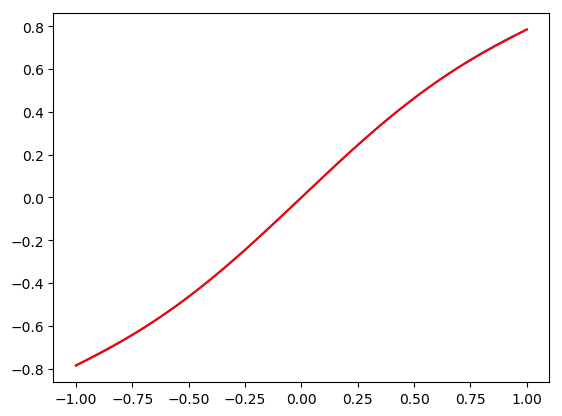

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000103991240>

In [2059]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

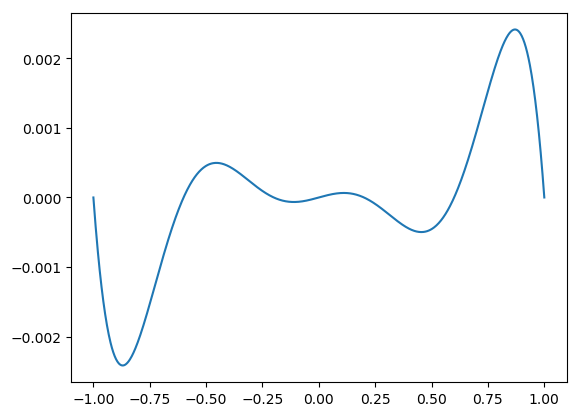

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000103C0B630>

In [2060]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [2061]:
nds = chebyshev_zeros_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

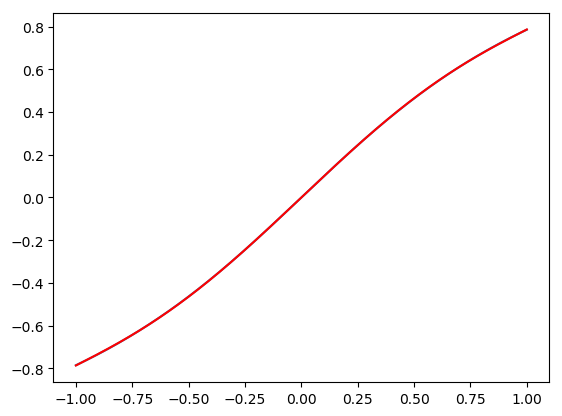

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000103652358>

In [2062]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

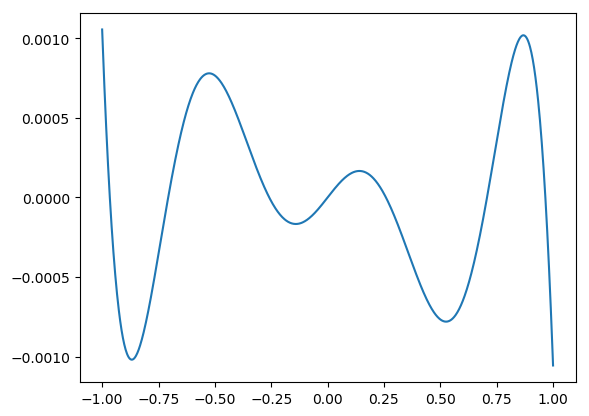

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000104131710>

In [2063]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [2064]:
nds = random_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

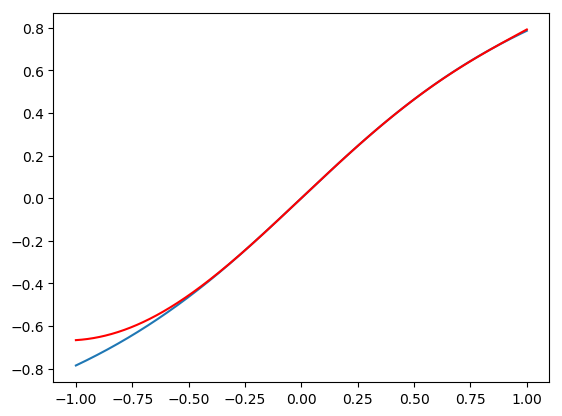

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000010439D6A0>

In [2065]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

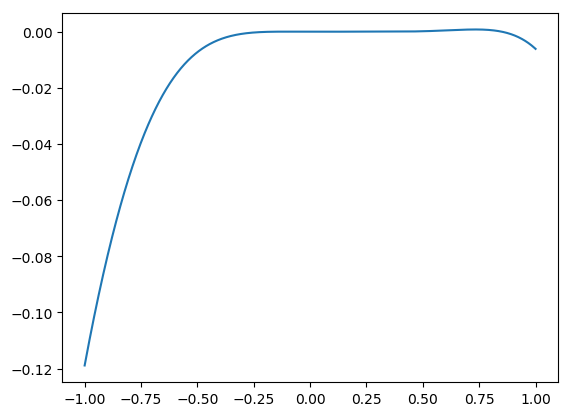

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001046D4A90>

In [2066]:
draw_functions_difference(samples, f, i)

### 16 węzłów

##### Węzły równoodległe

In [2067]:
nds = even_spaced_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

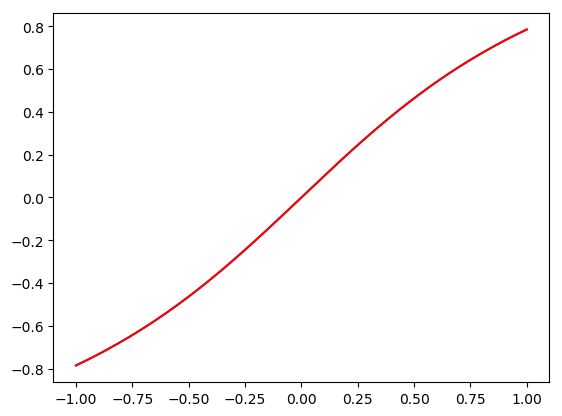

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000103E615C0>

In [2068]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

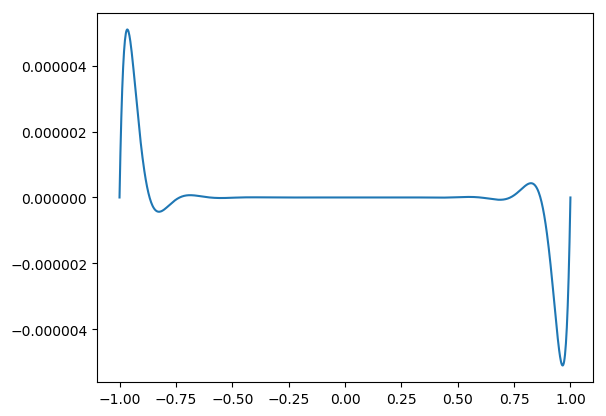

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000104B972B0>

In [2069]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [2070]:
nds = chebyshev_zeros_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

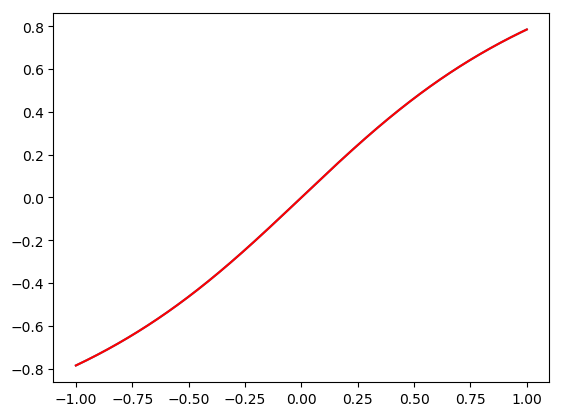

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000104B97358>

In [2071]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

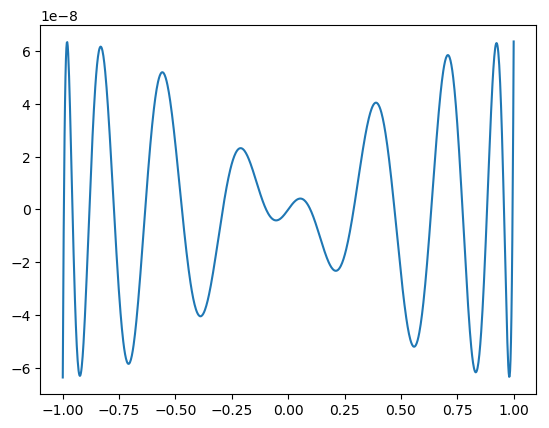

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000105041470>

In [2072]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [2073]:
nds = random_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

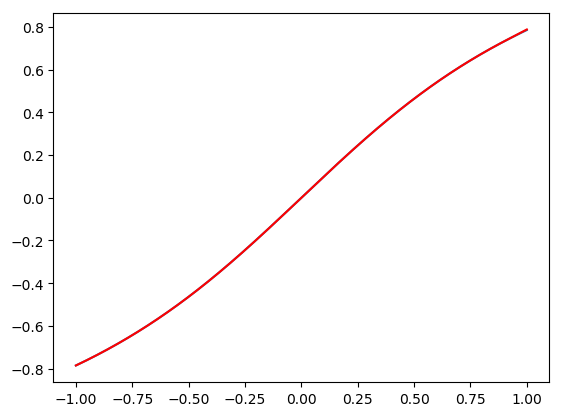

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000105041518>

In [2074]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

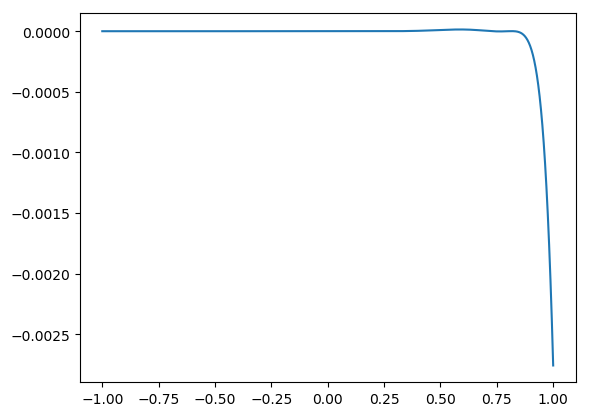

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001055A0EF0>

In [2075]:
draw_functions_difference(samples, f, i)

## Test 3. $f(x) = \max(0, 1 − 4x)$

In [2076]:
f(x) = max(0, 1 - 4 * x)

f (generic function with 1 method)

### 6 węzłów

##### Węzły równoodległe

In [2077]:
nds = even_spaced_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

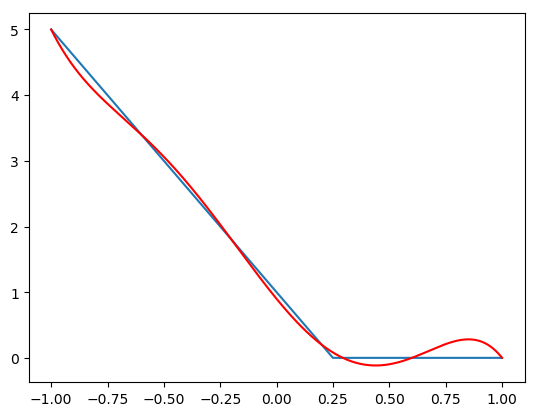

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000010584D320>

In [2078]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

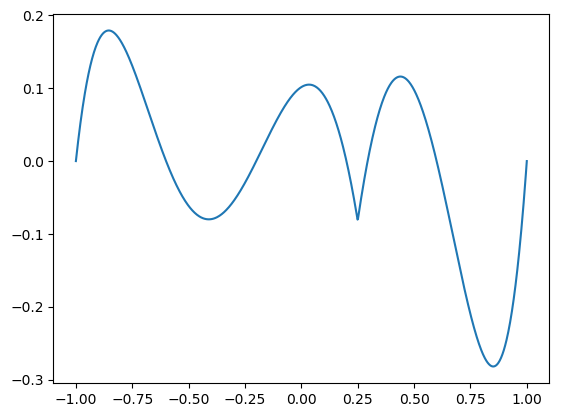

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000010594F7F0>

In [2079]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [2080]:
nds = chebyshev_zeros_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

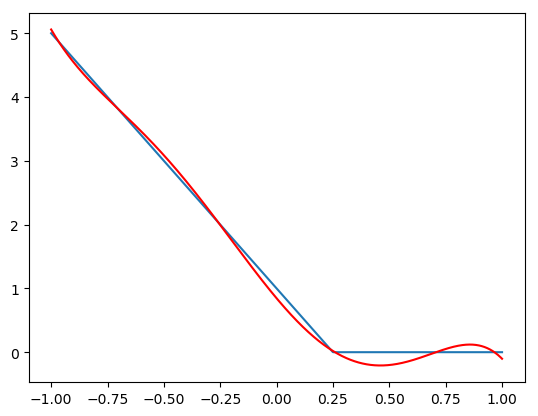

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000105C3FBE0>

In [2081]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

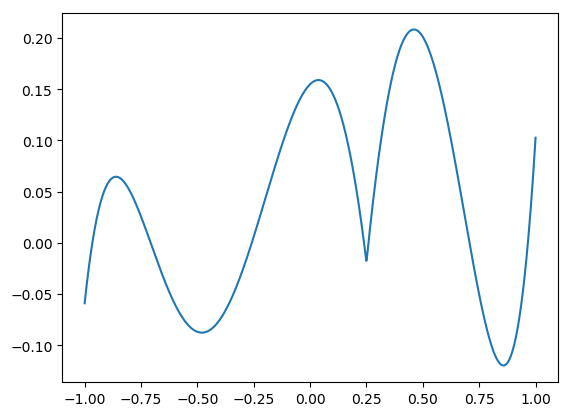

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000105FDB2B0>

In [2082]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [2083]:
nds = random_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

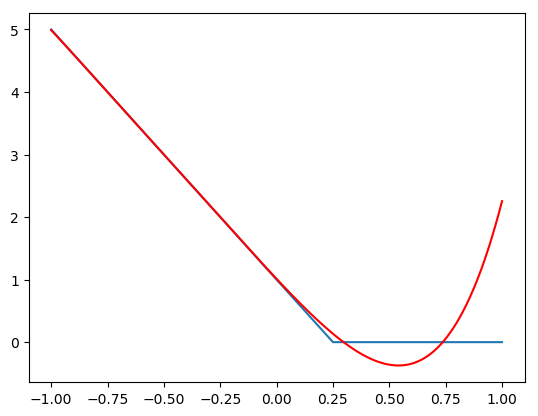

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001062A6B00>

In [2084]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

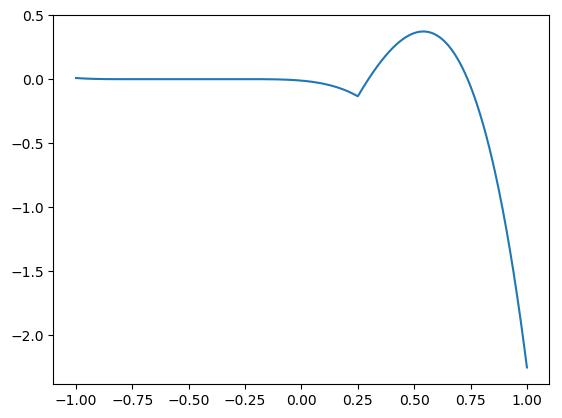

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000010636FE10>

In [2085]:
draw_functions_difference(samples, f, i)

### 16 węzłów

##### Węzły równoodległe

In [2086]:
nds = even_spaced_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

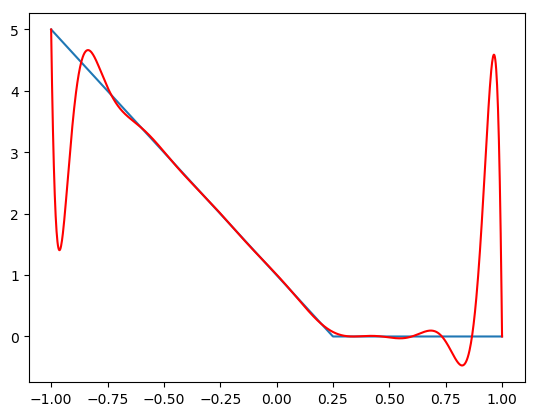

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000010636FEB8>

In [2087]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

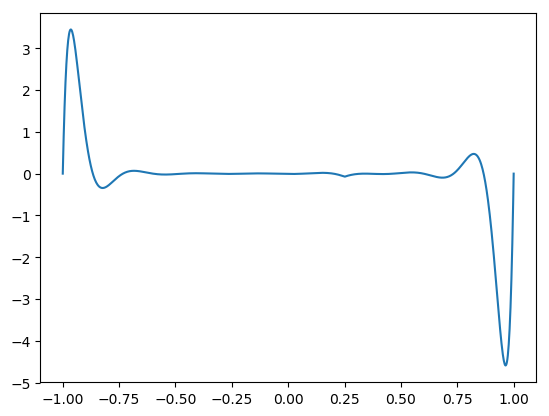

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001069D8710>

In [2088]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [2089]:
nds = chebyshev_zeros_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

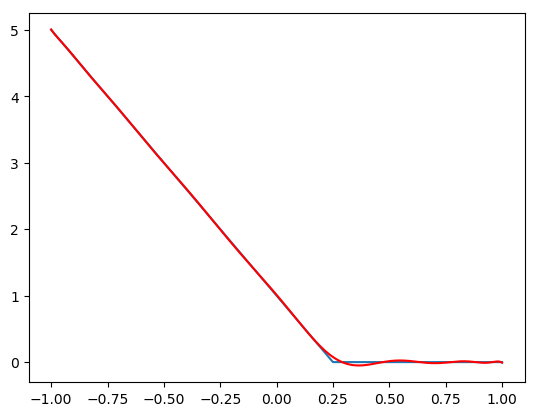

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001069D87B8>

In [2090]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

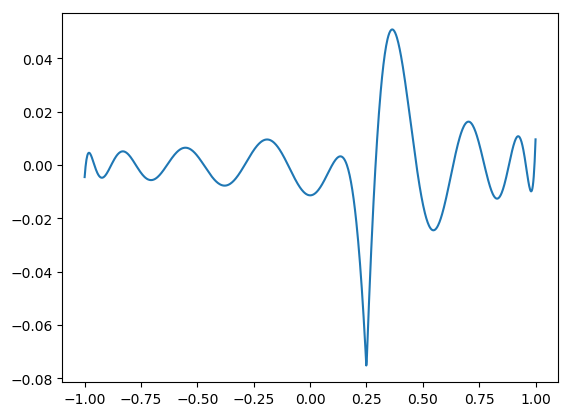

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000106EDD9B0>

In [2091]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [2092]:
nds = random_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

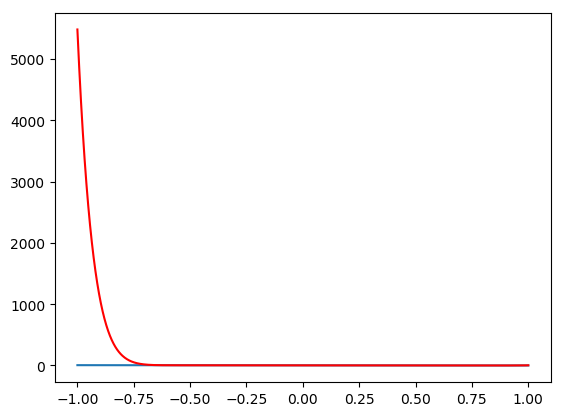

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000106EDDA58>

In [2093]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

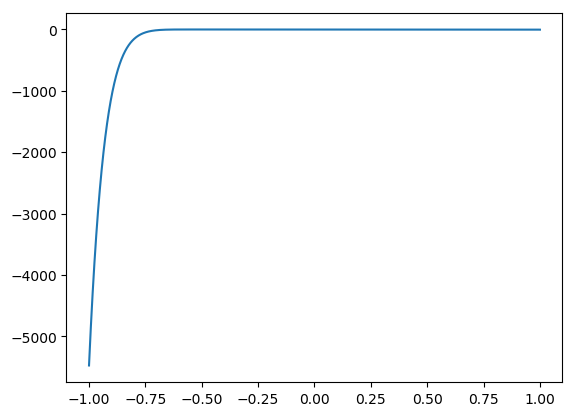

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000107394710>

In [2094]:
draw_functions_difference(samples, f, i)

## Test 4.          $f(x) = -\mid x \mid + 1$

In [2095]:
f(x) = -abs(x) + 1

f (generic function with 1 method)

### 6 węzłów

##### Węzły równoodległe

In [2096]:
nds = even_spaced_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

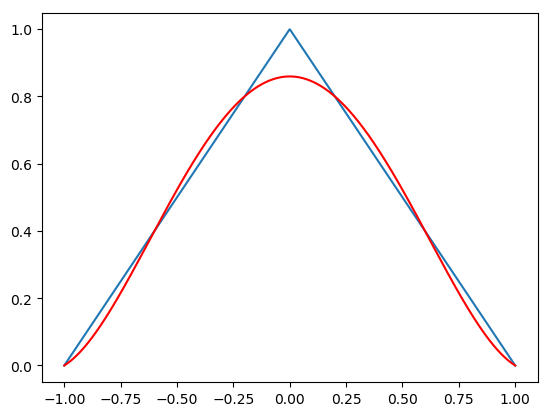

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000107668B00>

In [2097]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

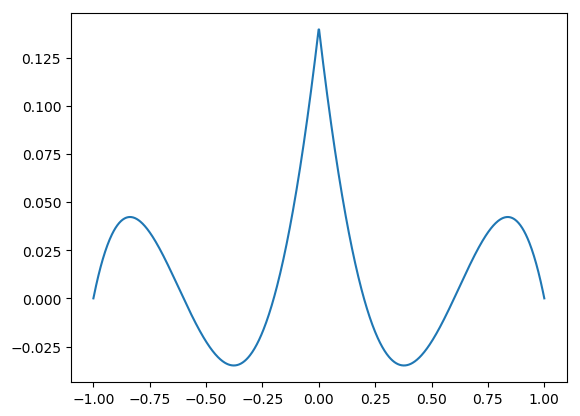

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001078F81D0>

In [2098]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [2099]:
nds = chebyshev_zeros_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

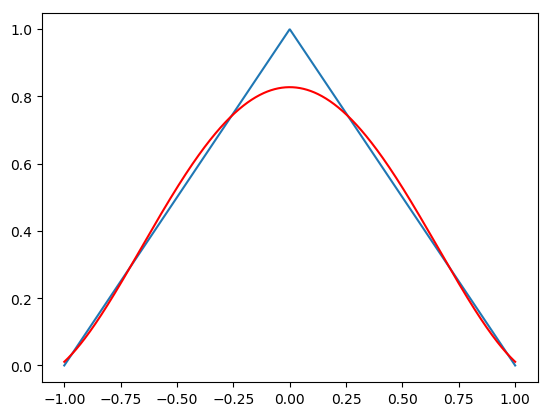

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000107AE8A20>

In [2100]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

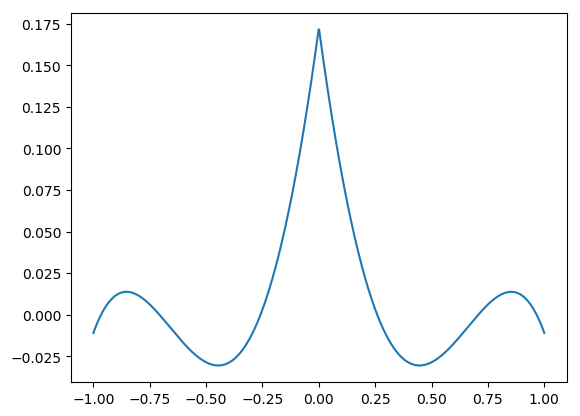

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000107C6DD30>

In [2101]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [2102]:
nds = random_nodes(5)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

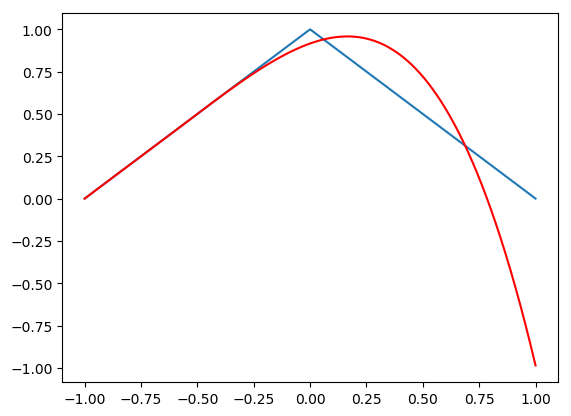

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000107EC0E80>

In [2103]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

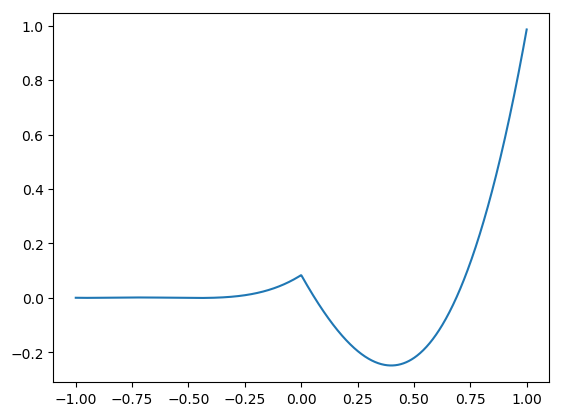

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000010834D2B0>

In [2104]:
draw_functions_difference(samples, f, i)

### 16 węzłów

##### Węzły równoodległe

In [2105]:
nds = even_spaced_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

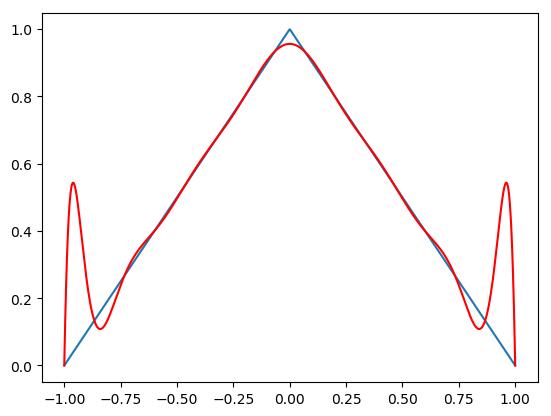

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000107C6DDD8>

In [2106]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

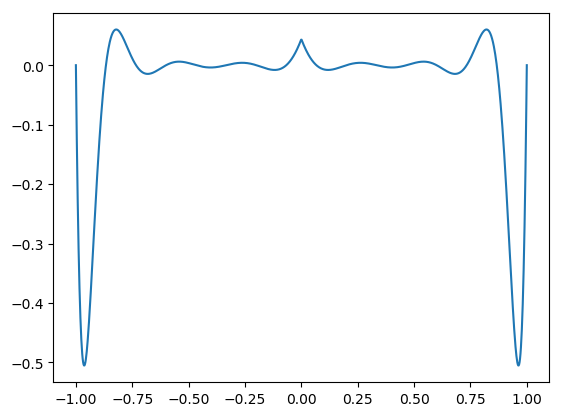

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000108817E10>

In [2107]:
draw_functions_difference(samples, f, i)

##### Węzły będące zerami wielomianu Czebyszewa pierwszego rodzaju

In [2108]:
nds = chebyshev_zeros_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

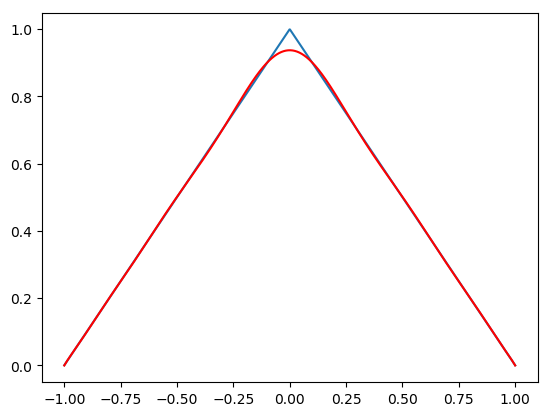

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000108817EB8>

In [2109]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

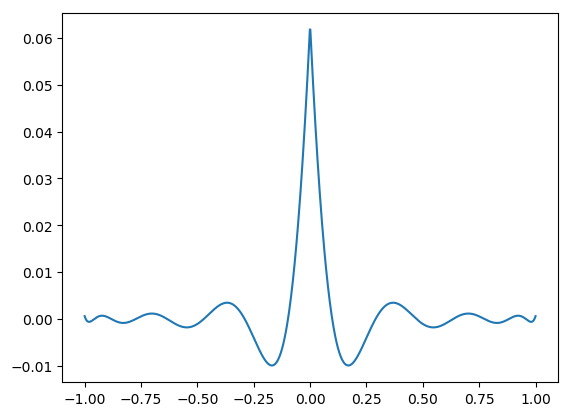

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000108D1B710>

In [2110]:
draw_functions_difference(samples, f, i)

##### Losowe węzły

In [2111]:
nds = random_nodes(15)
i(x) = interpolation_polynomial(f, nds, x)

i (generic function with 1 method)

##### Funkcja f (na niebiesko) oraz wielomian interpolacyjny (na czerwono)

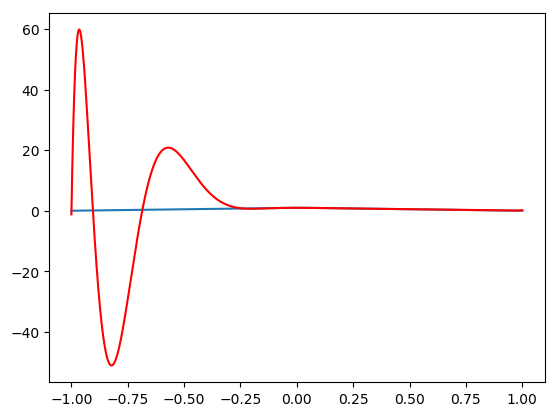

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000108D1B7B8>

In [2112]:
draw_two_functions(samples, f, i)

##### Wykres błędu interpolacji

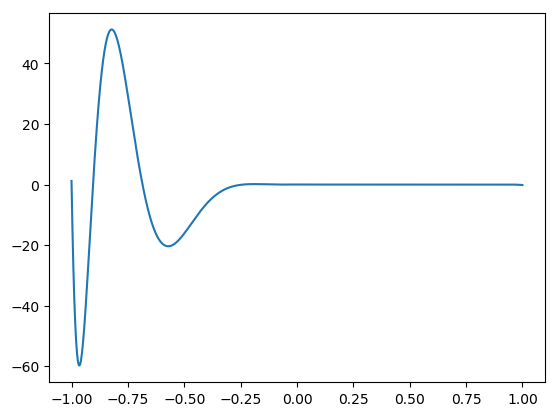

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001092478D0>

In [2113]:
draw_functions_difference(samples, f, i)